In [1]:
import folium
import pandas
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv("Webmap_datasources/Volcanoes.txt")


<AxesSubplot:>

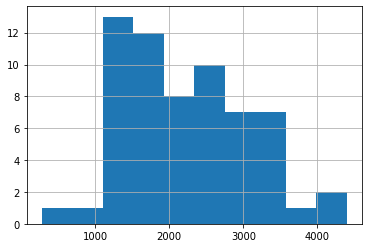

In [3]:
# check elevation distribution to decide coloring thresholds
data.ELEV.hist()

In [4]:
def produce_color(elev):
    if elev < 1500:
        color = 'green'
    elif elev >= 1500 and elev < 3000:
        color = 'orange'
    else:
        color = 'red'
    return color

In [5]:
lat = list(data["LAT"])
lon = list(data["LON"])
elev = list(data["ELEV"])
 
html = """<h4>Volcano information:</h4>
Height: %s m
"""
 
map = folium.Map(location=[38.58, -99.09], zoom_start=5, tiles="Stamen Terrain")
 

In [6]:
fg_v = folium.FeatureGroup(name='Volcanoes')
for lt, ln, el in zip(lat, lon, elev):
    iframe = folium.IFrame(html=html % str(el), width=200, height=100)
    fg_v.add_child(folium.CircleMarker(location=[lt, ln], 
                                     radius = 6,
                                     popup=str(el) + ' m',
                                     fillColor = produce_color(el),
                                     color = produce_color(el),
                                     fill_opacity = 0.7
                                    )
                )
 
 

In [7]:
fg_p = folium.FeatureGroup(name='Population')
fg_p.add_child(folium.GeoJson(data=open('Webmap_datasources/world.json',
                                      'r', encoding='utf-8-sig').read(),
                            style_function=(lambda x: {'fillColor':'green'
                            if x['properties']['POP2005'] < 10e6
                            else 'orange' if 10e6 <= x['properties']['POP2005'] < 20e6 
                            else 'red'}
                                           )
                           )
            )
            

In [8]:
map.add_child(fg_v)
map.add_child(fg_p)

map.add_child(folium.LayerControl())
map.save("Map_html_popup_simple.html")